## Generación del diarama williams para el modelo, incluyendo Espirodiclofén. 

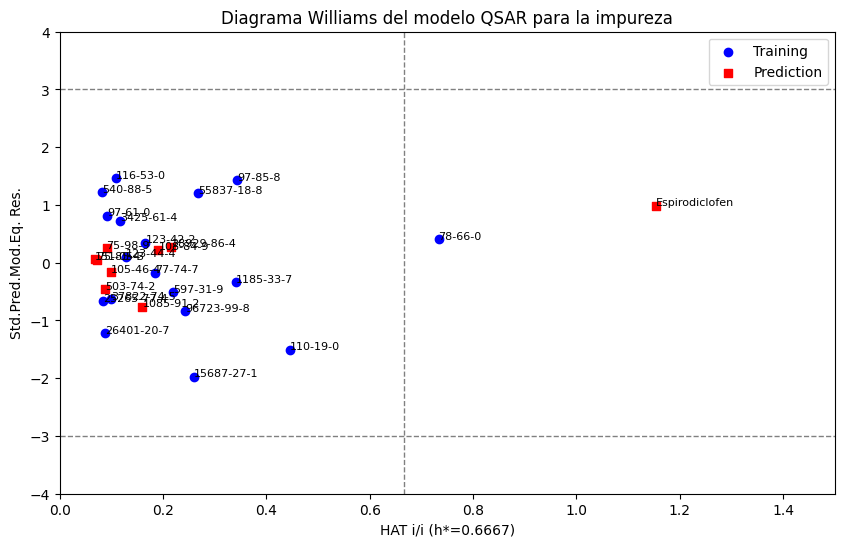

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def create_scatterplot(file_path):
    # Leer el archivo de Excel
    df = pd.read_excel(file_path)

    # Filtrar los datos para Training y Prediction
    training_data = df[df['Status'] == 'Training']
    prediction_data = df[df['Status'] == 'Prediction']

    # Crear el scatterplot
    plt.figure(figsize=(10, 6))

    # Puntos para Training
    plt.scatter(training_data['HAT i/i (h*=0.6667)'],
                training_data['Std.Pred.Mod.Eq. Res.'],
                color='blue',
                marker='o',
                label='Training')

    # Puntos para Prediction
    plt.scatter(prediction_data['HAT i/i (h*=0.6667)'],
                prediction_data['Std.Pred.Mod.Eq. Res.'],
                color='red',
                marker='s',
                label='Prediction')

    # Etiquetar cada punto con su CAS correspondiente
    for index, row in df.iterrows():
        plt.text(row['HAT i/i (h*=0.6667)'],
                 row['Std.Pred.Mod.Eq. Res.'],
                 row['CAS'],
                 fontsize=8)

    # Etiquetas de los ejes y título del gráfico
    plt.xlabel('HAT i/i (h*=0.6667)')
    plt.ylabel('Std.Pred.Mod.Eq. Res.')
    plt.title('Diagrama Williams del modelo QSAR para la impureza')

    # Límites de los ejes
    plt.xlim(0, 1.5)
    plt.ylim(-4, 4)

    # Agregar líneas punteadas horizontales en y = -3 y y = 3
    plt.axhline(y=-3, color='gray', linestyle='dashed', linewidth=1)
    plt.axhline(y=3, color='gray', linestyle='dashed', linewidth=1)

    # Agregar línea punteada vertical en x = 0.6667
    plt.axvline(x=0.6667, color='gray', linestyle='dashed', linewidth=1)

    # Mostrar leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

# Ruta completa del archivo Excel
archivo_excel = r'C:\Users\quant\Desktop\residuals.xlsx'
create_scatterplot(archivo_excel)


## Similitud estructural de la impureza con Espirodiclofén

Similitud de Tanimoto: 0.29


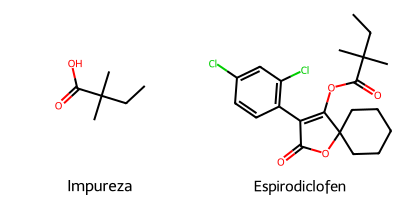

In [14]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.DataStructs import TanimotoSimilarity
from rdkit.Chem.Draw import MolsToGridImage

# Define the compounds.
impureza = "O=C(O)C(CC)(C)C"
Espirodiclofén = "Clc1c(C2=C(OC(=O)C(CC)(C)C)C3(OC2=O)CCCCC3)ccc(Cl)c1"

# Convert to mol objects.
mol1 = Chem.MolFromSmiles(impureza)
mol2 = Chem.MolFromSmiles(Espirodiclofén)

# Calculate the MACCS fingerprints.
fps1 = MACCSkeys.GenMACCSKeys(mol1)
fps2 = MACCSkeys.GenMACCSKeys(mol2)

# Calculate the Tanimoto similarity.
similitud_tanimoto = round(TanimotoSimilarity(fps1, fps2), 2)

# Print the results.
print("Similitud de Tanimoto:", similitud_tanimoto)

# Draw the structures.
MolsToGridImage([mol1, mol2], molsPerRow=2, legends=["Impureza", "Espirodiclofen"])


## Ocurrencia de fragmentos en los compuestos del dataset y Espirodiclofén. 

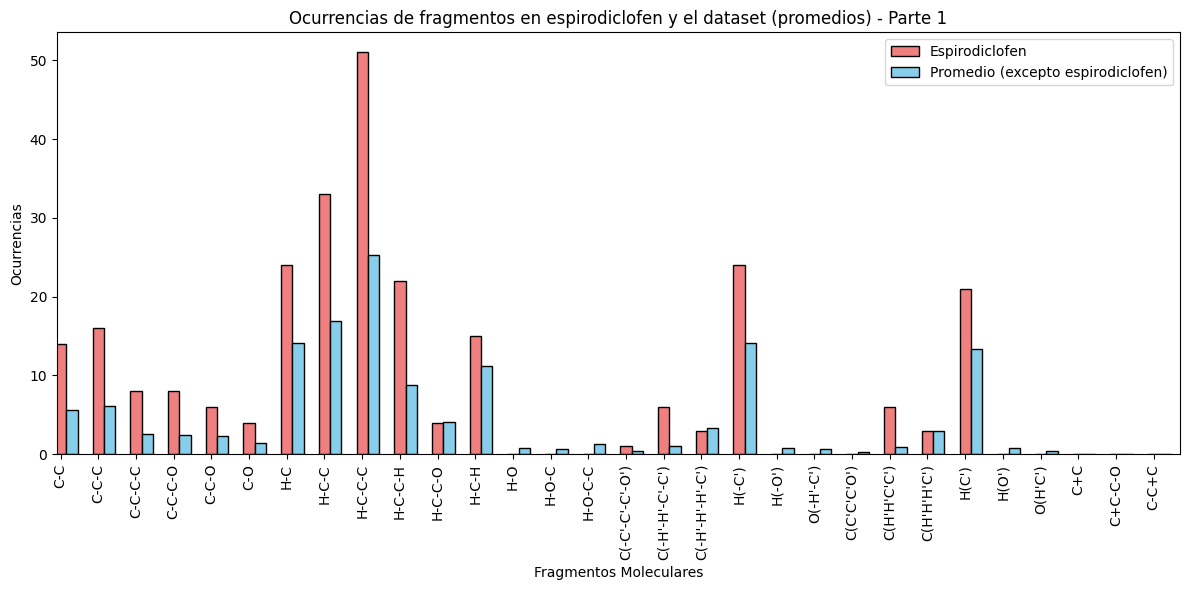

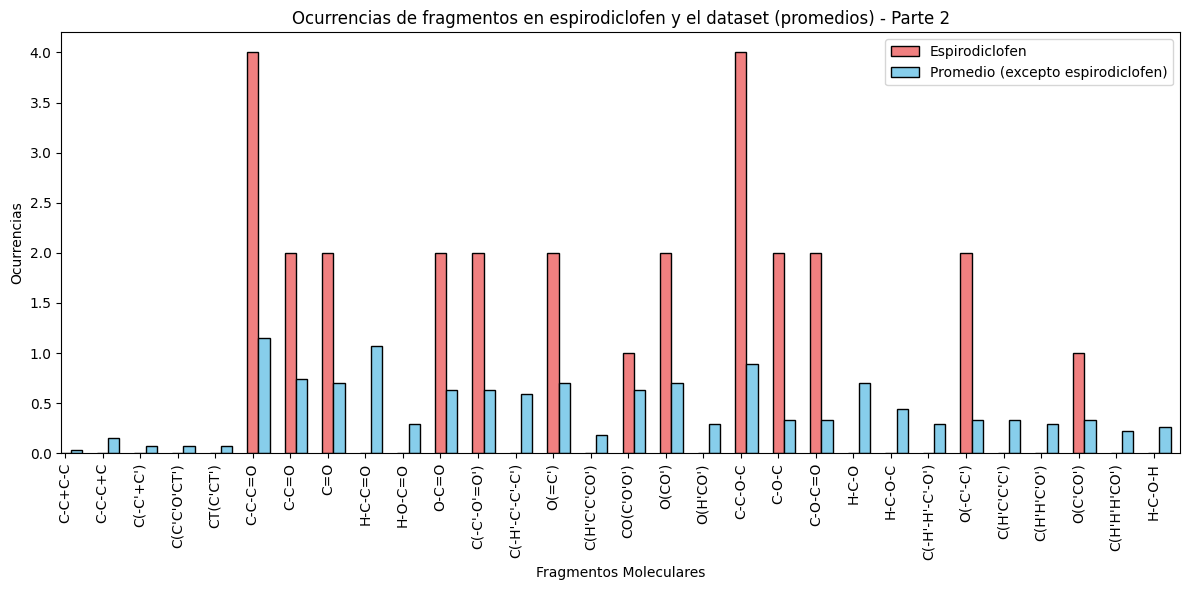

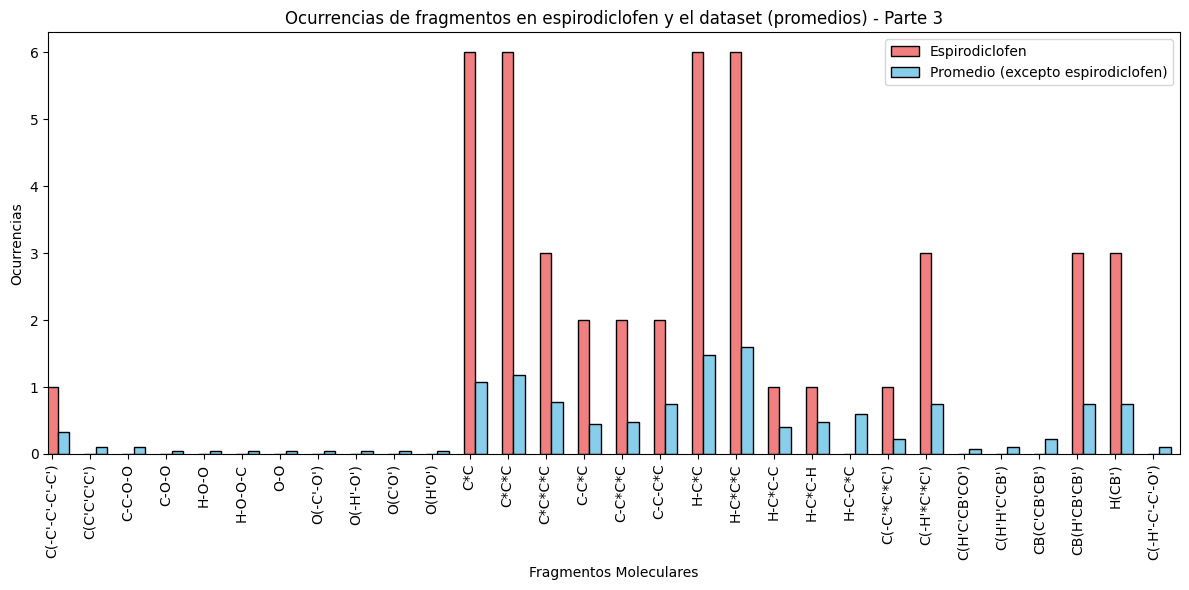

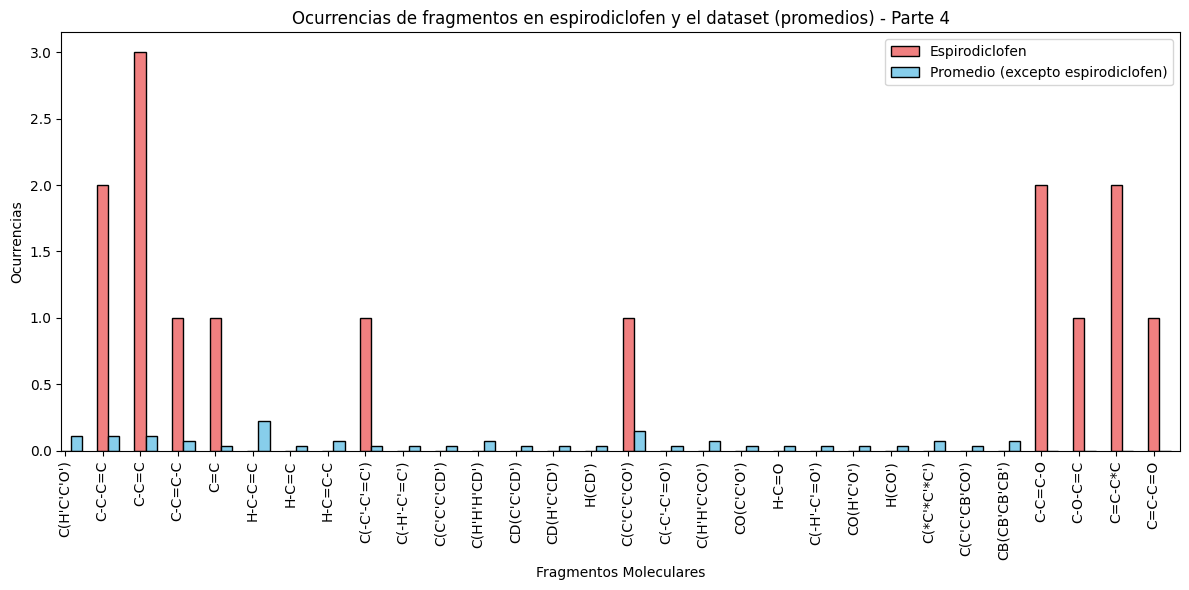

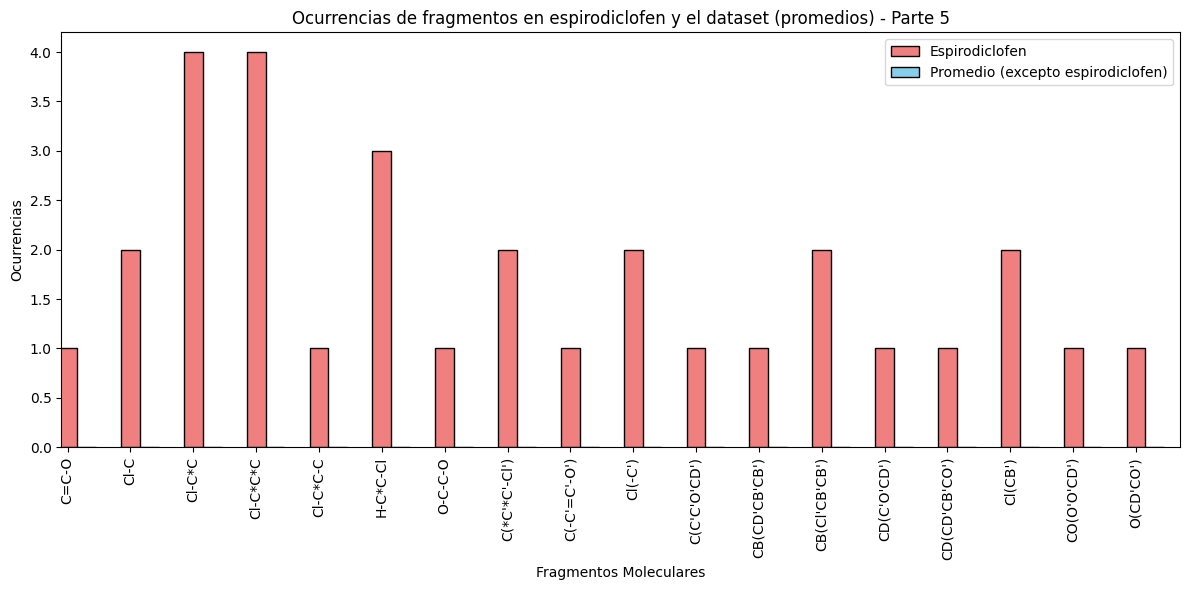

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo de Excel
file_path = r'C:\Users\quant\Desktop\fragments.xlsx'
df = pd.read_excel(file_path, index_col=0)

# Filtrar solo las filas correspondientes a espirodiclofen (reemplaza 'espirodiclofen' con el valor real en la columna CAS)
df_espirodiclofen = df[df.index == 'espirodiclofen']

# Obtener las ocurrencias de espirodiclofen
occurrences_espirodiclofen = df_espirodiclofen.iloc[0]

# Filtrar todos los compuestos excepto espirodiclofen (reemplaza 'espirodiclofen' con el valor real en la columna CAS)
df_except_espirodiclofen = df[df.index != 'espirodiclofen']

# Calcular el promedio de ocurrencias para cada fragmento
average_occurrences = df_except_espirodiclofen.mean()

# Dividir los fragmentos en grupos (por ejemplo, grupos de 30 fragmentos por gráfica)
groups = [average_occurrences.index[i:i+30] for i in range(0, len(average_occurrences), 30)]

# Crear las tres gráficas
for i, group in enumerate(groups):
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # Graficar las ocurrencias de espirodiclofen
    occurrences_espirodiclofen[group].plot(kind='bar', color='lightcoral', edgecolor='black', ax=ax, position=0.5, width=0.3, label='Espirodiclofen')

    # Graficar el promedio de ocurrencias en todos los compuestos excepto espirodiclofen
    average_occurrences[group].plot(kind='bar', color='skyblue', edgecolor='black', ax=ax, position=-0.5, width=0.3, label='Promedio (excepto espirodiclofen)')

    plt.xlabel('Fragmentos Moleculares')
    plt.ylabel('Ocurrencias')
    plt.title(f'Ocurrencias de fragmentos en espirodiclofen y el dataset (promedios) - Parte {i+1}')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

# Mostrar las gráficas
plt.show()

## Cálculo de descriptores de espirodiclofén.

In [28]:
from alvadesccliwrapper.alvadesc import AlvaDesc

aDesc = AlvaDesc("\"C:/Program Files/Alvascience/alvaDesc/alvaDescCLI.exe\"")

aDesc.set_input_SMILES(['Clc1c(C2=C(OC(=O)C(CC)(C)C)C3(OC2=O)CCCCC3)ccc(Cl)c1'])

if not aDesc.calculate_descriptors(['TDB05u', 'Mor16e', 'SssssC']):
    print('Error: ' + aDesc.get_error())
else:
    print(aDesc.get_output_descriptors())
    print(aDesc.get_output())


['TDB05u', 'Mor16e', 'SssssC']
4.572 0.741 -1.545


## Clustering de compuestos químicos. 

C:\Users\quant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


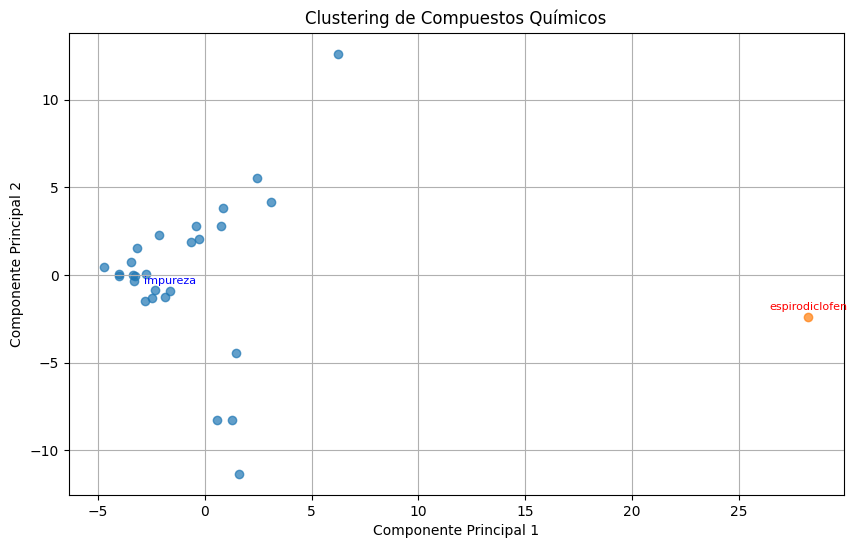

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Leer los datos desde el archivo Excel
data = pd.read_excel(r'C:\Users\quant\Desktop\fragments.xlsx')

# Extraer la columna 'CAS' para su uso posterior en la visualización
cas_numbers = data['CAS']

# Eliminar la columna 'CAS' del DataFrame para obtener solo los datos de fragmentos
fragment_data = data.drop(columns=['CAS'])

# Normalizar los datos (centrar y escalar) para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
normalized_fragment_data = scaler.fit_transform(fragment_data)

# Aplicar PCA con 2 componentes principales para reducir a un espacio bidimensional
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_fragment_data)

# Agregar los resultados de PCA al DataFrame
data['Componente 1'] = pca_result[:, 0]
data['Componente 2'] = pca_result[:, 1]

# Aplicar K-Means para agrupar los compuestos en clústeres
n_clusters = 2  # Especifica el número de clústeres que deseas crear
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_fragment_data)

# Agregar la información del clúster a los datos originales
data['Cluster'] = cluster_labels

# Crear un gráfico de dispersión con diferentes colores para visualizar los clústeres
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    if not cluster_data.empty:
        plt.scatter(
            cluster_data['Componente 1'],
            cluster_data['Componente 2'],
            alpha=0.7,
            label=f'Cluster {cluster}'
        )

# Filtrar y etiquetar puntos para los compuestos "espirodiclofen" e "impureza"
esp_labels = data[data['CAS'] == 'espirodiclofen']
imp_labels = data[data['CAS'] == 'impureza']
for index, row in esp_labels.iterrows():
    plt.annotate(row['CAS'], (row['Componente 1'], row['Componente 2']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='red')
for index, row in imp_labels.iterrows():
    plt.annotate(row['CAS'], (row['Componente 1'], row['Componente 2']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='blue')

# Configurar los ejes y etiquetas
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering de Compuestos Químicos')
plt.grid(True)

plt.show()

